<a href="https://colab.research.google.com/github/Sailex-Salam/Meitei-Mayek/blob/main/Meitei_Mayek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import os
import random
from matplotlib import pyplot as plt

In [ ]:
directory = r'/content/drive/MyDrive/train'
categories = ['ꯀ','ꯁ','ꯂ']

In [ ]:
data = []

In [ ]:
# for category in categories:
#   folder = os.path.join(directory, category)
#   label = categories.index(category)
#   for img in os.listdir(folder):
#     img_path = os.path.join(folder, img)
#     img_arr = cv2.imread(img_path)
#     img_arr = cv2.resize(img_arr,(120,120))
#     data.append([img_arr, label])
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)

        if img_arr is None:
            continue

        img_arr = cv2.resize(img_arr, (120, 120))

        # Original image
        data.append([img_arr, label])




        # Augmentation 3: Add Gaussian Noise
        noise = np.random.normal(0, 15, img_arr.shape).astype(np.uint8)
        noisy = cv2.add(img_arr, noise)
        data.append([noisy, label])


        # Augmentation 6: Gaussian Blur
        blurred = cv2.GaussianBlur(img_arr, (5, 5), 0)
        data.append([blurred, label])

        # Augmentation 7: Brightness Adjustment
        brightness = cv2.convertScaleAbs(img_arr, alpha=1.3, beta=30)
        data.append([brightness, label])

        # Augmentation 8: Slight Zoom Out
        scale_factor = 0.9
        M_scale = cv2.getRotationMatrix2D((60, 60), 0, scale_factor)
        scaled = cv2.warpAffine(img_arr, M_scale, (120, 120))
        data.append([scaled, label])

In [ ]:
random.shuffle(data)


In [ ]:
x = []
y = []


In [ ]:
for features, label in data:
  x.append(features)
  y.append(label)

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x = x/255

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.layers import Dropout, BatchNormalization

In [ ]:
model = Sequential()

In [ ]:

x.shape

(1440, 120, 120, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x, y, epochs=20, validation_split=0.2)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.7677 - loss: 0.6963 - val_accuracy: 0.4479 - val_loss: 7.0464
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.9232 - loss: 0.2584 - val_accuracy: 0.6979 - val_loss: 0.7295
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.9445 - loss: 0.1361 - val_accuracy: 0.8090 - val_loss: 0.4843
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9678 - loss: 0.1111 - val_accuracy: 0.7049 - val_loss: 0.7315
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.9891 - loss: 0.0405 - val_accuracy: 0.7535 - val_loss: 0.5904
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.9849 - loss: 0.0479 - val_accuracy: 0.7535 - val_loss: 0.5564
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.9805 - loss: 0.0491 - val_accuracy: 0.6597 - val_loss: 0.9236
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.8854 - v

In [ ]:
model.save('/content/drive/MyDrive/Models/LateNight.h5')

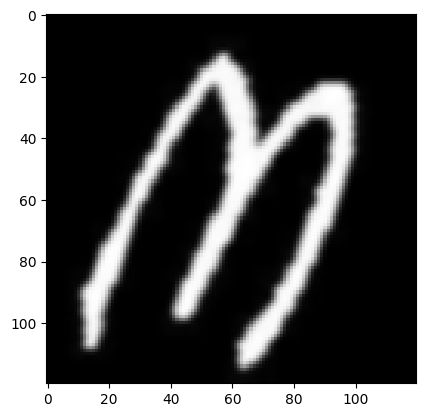

In [ ]:
id = 821
plt.imshow(x[id])

In [ ]:
prediction = model.predict(x)
s = prediction[id]
print(s)
k = np.argmax(prediction[id])
if k == 0:
  print('ꯀ')
elif k == 1:
  print('ꯁ')
elif k == 2:
  print('ꯂ')

45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 530ms/step
[3.8838825e-05 9.9973261e-01 2.2864145e-04]
ꯁ


In [ ]:
from tensorflow.keras.models import load_model

# Load model from HDF5 file
model = load_model('/content/drive/MyDrive/Models/Mepoch20.h5')




In [ ]:

img = cv2.imread('/content/1.jpg')
img = cv2.resize(img, (120, 120))
img = img / 255.0  # Normalize if model was trained with normalization
img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 120, 120, 3)
img.shape

(1, 120, 120, 3)

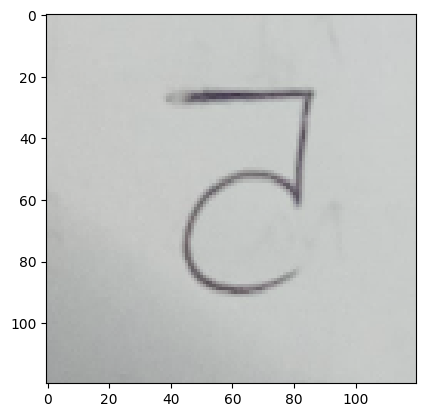

In [ ]:
plt.imshow(img[0])

In [ ]:
prediction = model.predict(img)
l = prediction[0]
print(np.ceil(l * 1e3) / 1e3)
c = np.argmax(l)
if c == 0:
  print(f'Detected : ꯀ \nAccuracy : {l[c]}')
elif c == 1:
  print(f'Detected : ꯁ \nAccuracy : {l[c]}')
elif c == 2:
  print(f'Detected : ꯂ \nAccuracy : {l[c]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[1.    0.001 0.001]
Detected : ꯀ 
Accuracy : 0.9999749660491943
